In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [27]:
analysis = scripts.Analysis()

In [28]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_1__3__4',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_.8__all.5__all.5',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [29]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_1__3__4',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_.8__all.5__all.5',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [30]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [31]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [32]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [33]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [34]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

ng = 8

nref = 3

p_refs = (/ 1,  10, 500 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 1,   3,   4 /)

data wgt
     &     /7*.5, .8/

planck_wgt_flux = 2

include 'mls75.pro'


In [35]:
fig.display_hrefanchor()

In [36]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [37]:
table_dgdgs.display_hrefanchor()

In [38]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [39]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [40]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

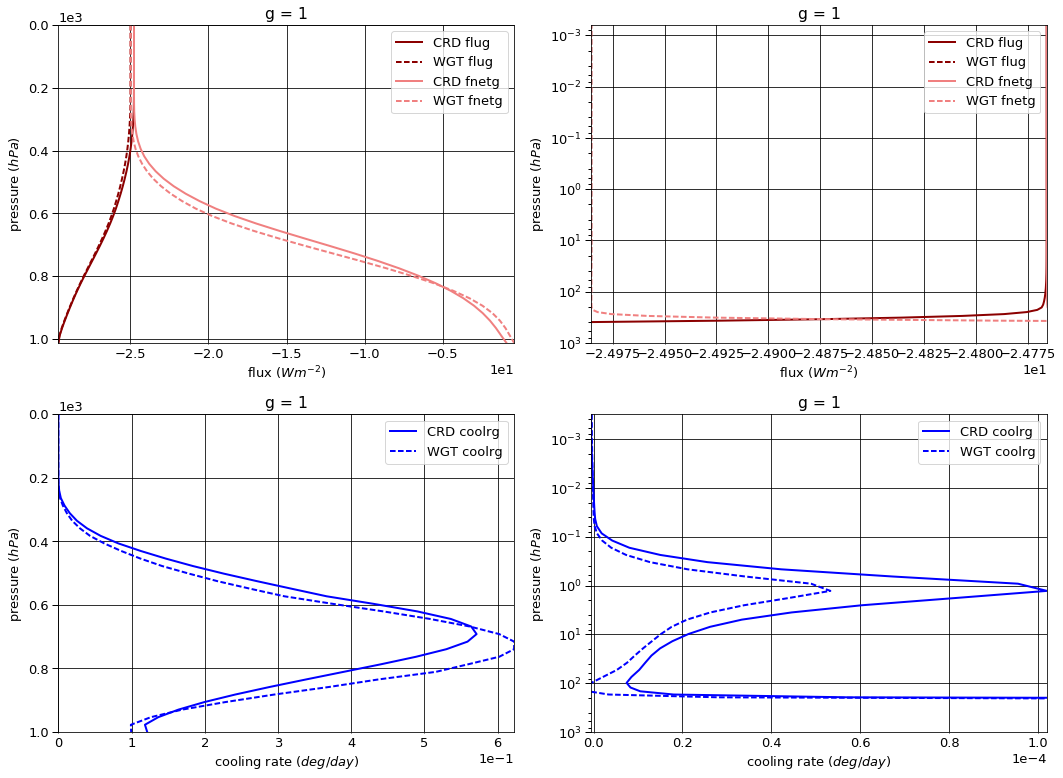

# Figure: flux, cooling rate g-group 2

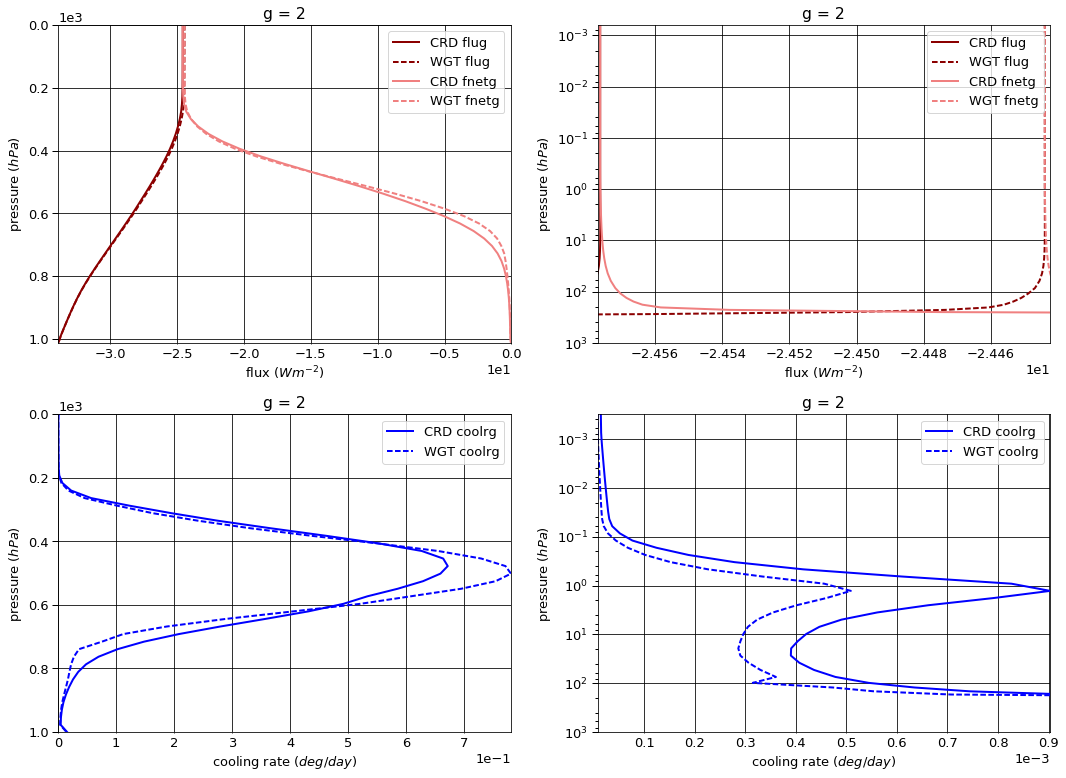

# Figure: flux, cooling rate g-group 3

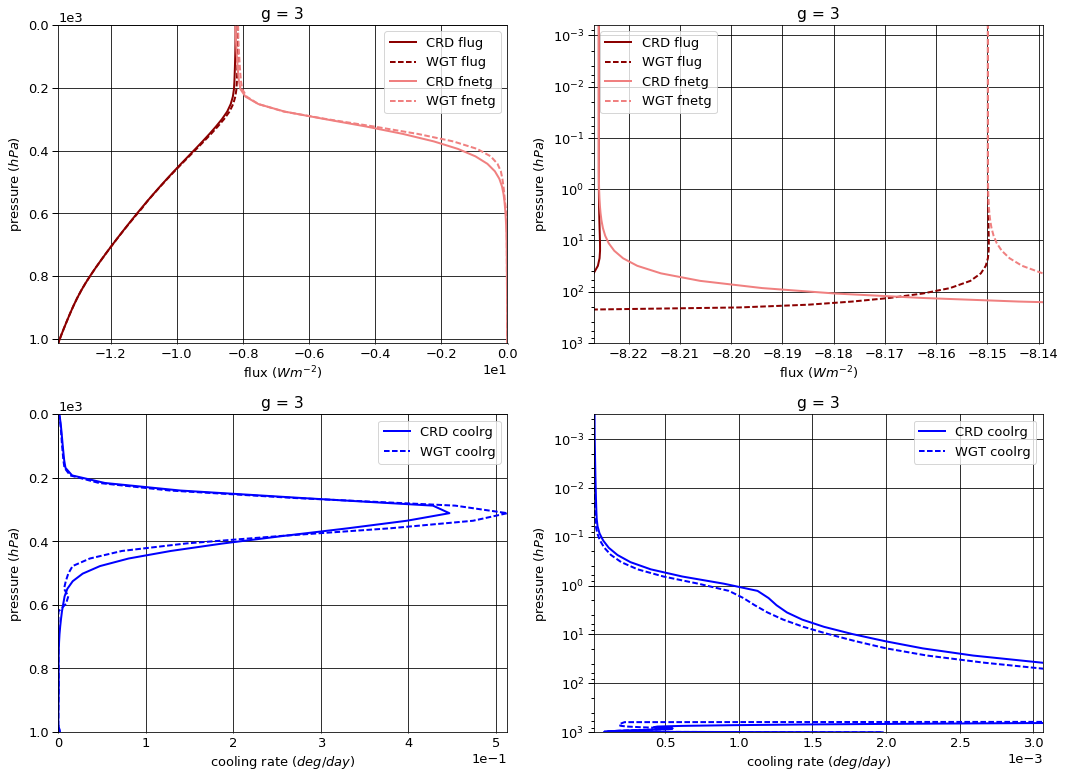

# Figure: flux, cooling rate g-group 4

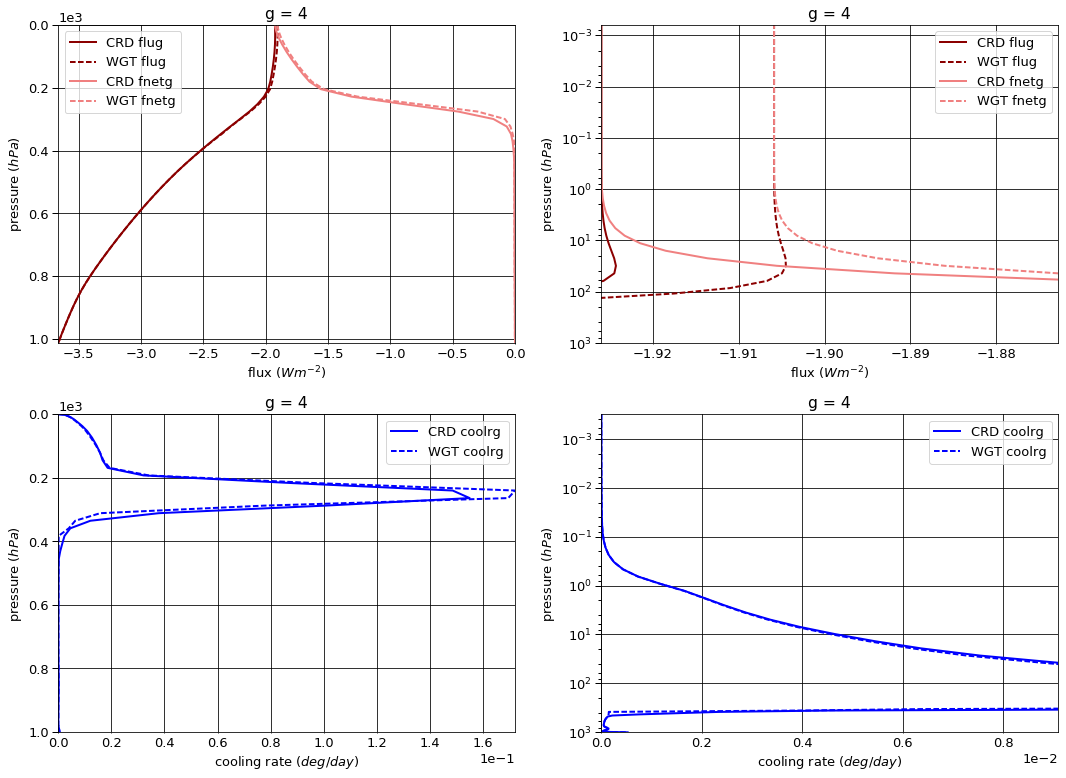

# Figure: flux, cooling rate g-group 5

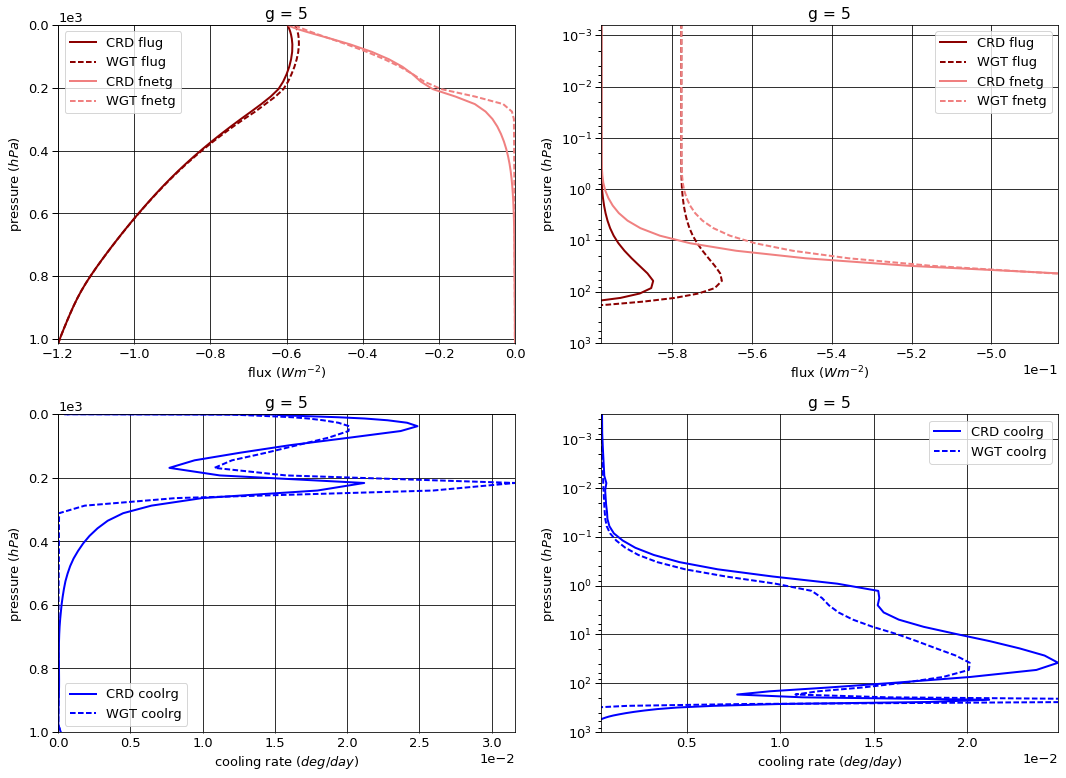

# Figure: flux, cooling rate g-group 6

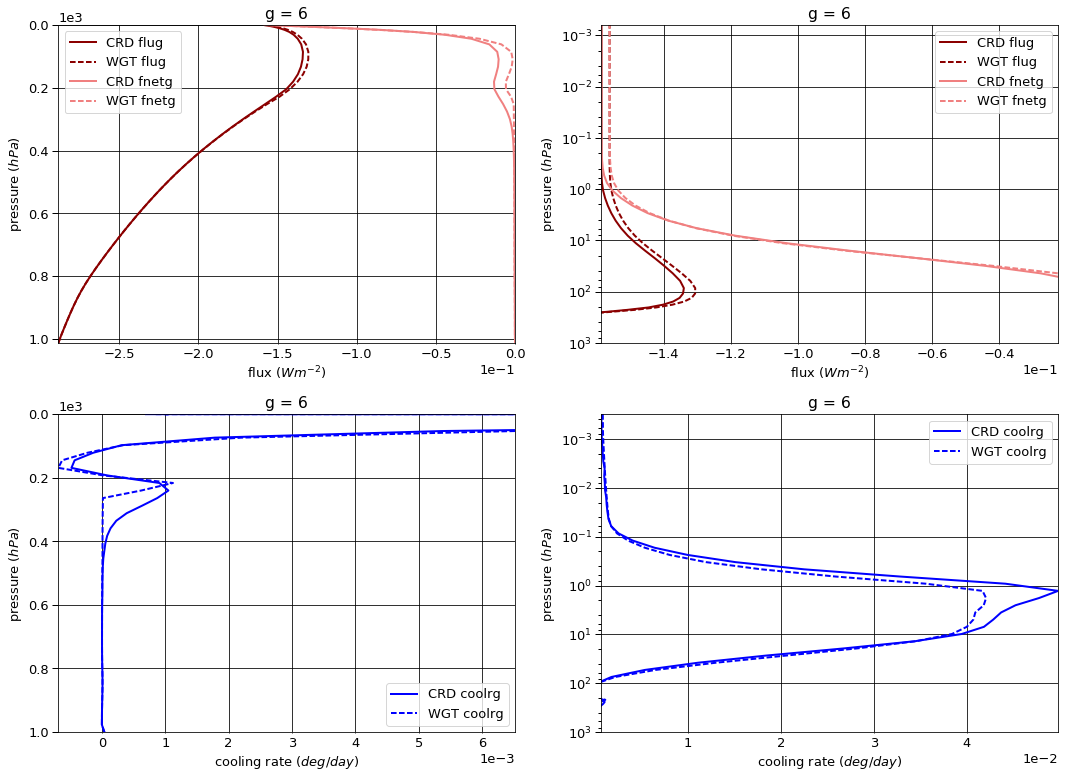

# Figure: flux, cooling rate g-group 7

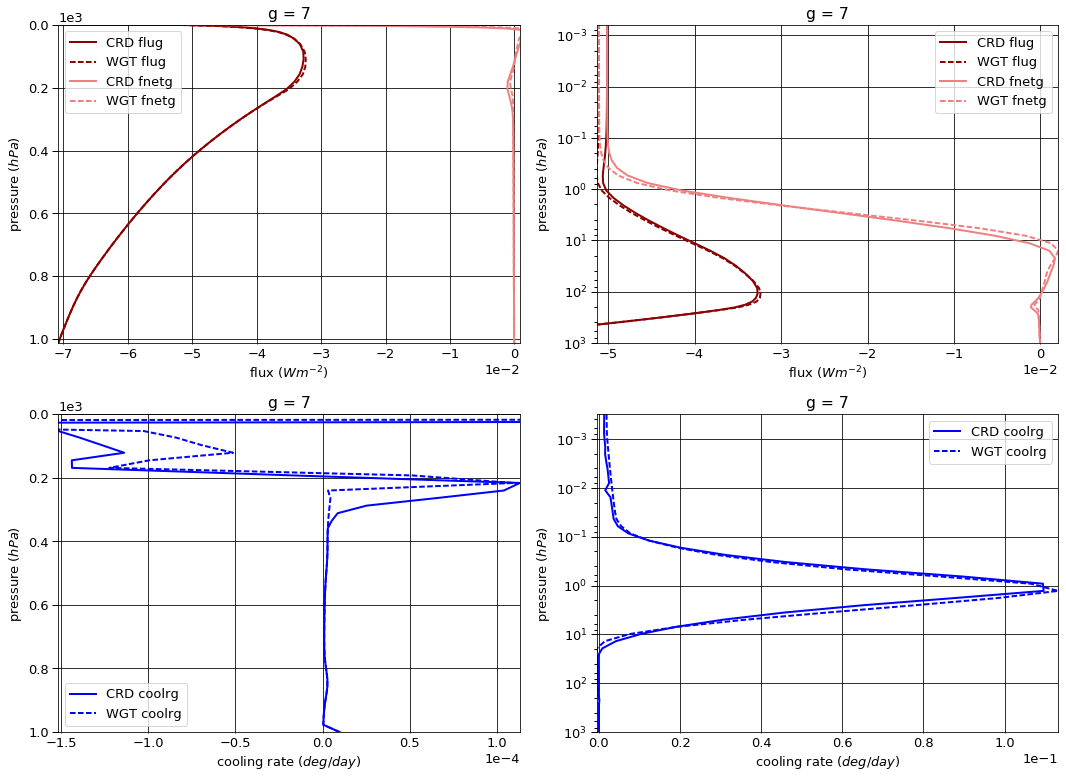

# Figure: flux, cooling rate g-group 8

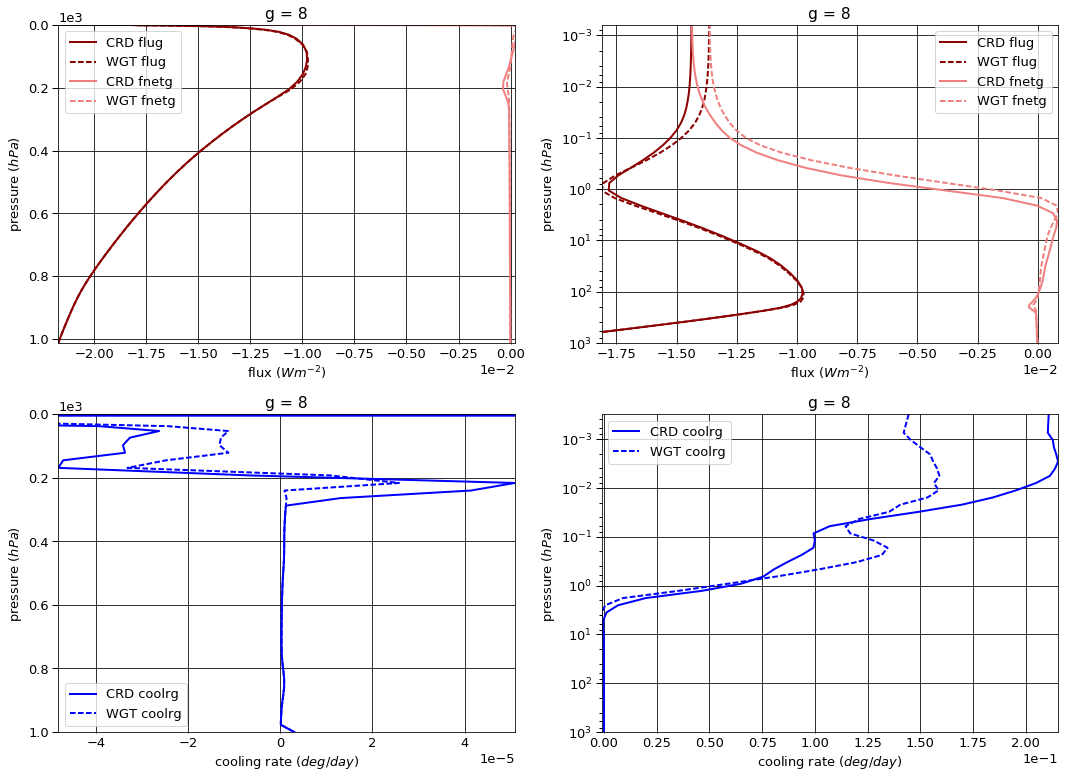

# Figure: flux, cooling rate g-group total

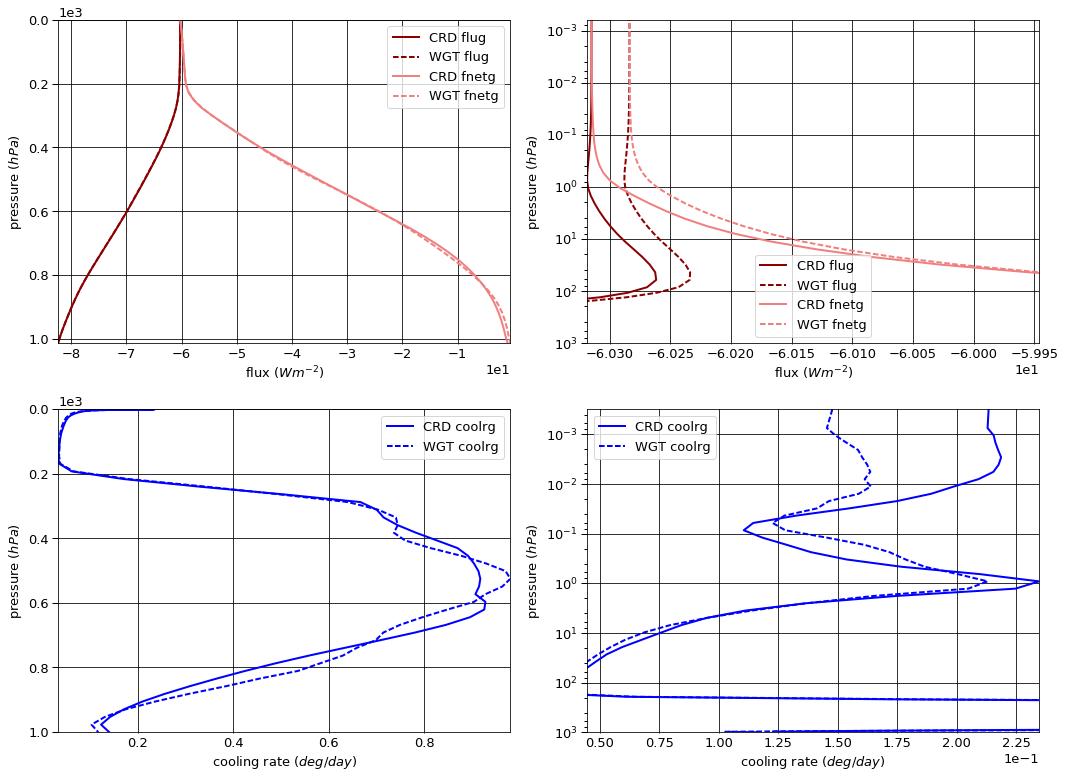

In [41]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [42]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -24.765928   0.000000 -24.765928
  1013.0   76    -29.612187  28.701387  -0.910800
2 0.0      1     -24.576310   0.000000 -24.576310
  1013.0   76    -33.877453  33.835372  -0.042081
3 0.0      1      -8.225838   0.000000  -8.225838
  1013.0   76    -13.584545  13.579074  -0.005471
4 0.0      1      -1.925965   0.000000  -1.925965
  1013.0   76     -3.661930   3.660473  -0.001457
5 0.0      1      -0.597731   0.000000  -0.597731
  1013.0   76     -1.198770   1.198272  -0.000497
6 0.0      1      -0.158530   0.000000  -0.158530
  1013.0   76     -0.288410   0.288295  -0.000116
7 0.0      1      -0.050130   0.000000  -0.050130
  1013.0   76     -0.070784   0.070756  -0.000028
8 0.0      1      -0.014380   0.000000  -0.014380
  1013.0   76     -0.021715   0.021706  -0.000009


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -24.985333   0.000000 -24.985333
  1013.0   76    -29.612187  29.193105  -0.419083
2 0.0      1     -24.443949   0.000000 -24.443949
  1013.0   76    -33.877453  33.840331  -0.037122
3 0.0      1      -8.149898   0.000000  -8.149898
  1013.0   76    -13.584545  13.579074  -0.005471
4 0.0      1      -1.905872   0.000000  -1.905872
  1013.0   76     -3.661930   3.660473  -0.001457
5 0.0      1      -0.577707   0.000000  -0.577707
  1013.0   76     -1.198770   1.198288  -0.000481
6 0.0      1      -0.156115   0.000000  -0.156115
  1013.0   76     -0.288410   0.288295  -0.000116
7 0.0      1      -0.051063   0.000000  -0.051063
  1013.0   76     -0.070784   0.070756  -0.000028
8 0.0      1      -0.013640   0.000000  -0.013640
  1013.0   76     -0.021715   0.021706  -0.000009


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.219405  0.000000 -0.219405
  1013.0   76     0.000000  0.491718  0.491718
2 0.0      1      0.132361  0.000000  0.132361
  1013.0   76     0.000000  0.004959  0.004959
3 0.0      1      0.075940  0.000000  0.075940
  1013.0   76     0.000000  0.000000  0.000000
4 0.0      1      0.020094  0.000000  0.020094
  1013.0   76     0.000000  0.000000  0.000000
5 0.0      1      0.020024  0.000000  0.020024
  1013.0   76     0.000000  0.000016  0.000016
6 0.0      1      0.002415  0.000000  0.002415
  1013.0   76     0.000000  0.000000  0.000000
7 0.0      1     -0.000933  0.000000 -0.000933
  1013.0   76     0.000000  0.000000  0.000000
8 0.0      1      0.000740  0.000000  0.000740
  1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -5.643831e-07
  1001.112500 75     1.215760e-01
2 0.000312    1      1.440772e-05
  1001.112500 75     1.588356e-02
3 0.000312    1      2.076154e-05
  1001.112500 75     1.976380e-03
4 0.000312    1      2.896888e-06
  1001.112500 75     5.262283e-04
5 0.000312    1      4.647739e-04
  1001.112500 75     1.798811e-04
6 0.000312    1      6.977601e-04
  1001.112500 75     4.179785e-05
7 0.000312    1      1.333014e-03
  1001.112500 75     1.007732e-05
8 0.000312    1      2.109479e-01
  1001.112500 75     3.162839e-06


WGT


coolrg
g pressure    layer              
1 0.000312    1     -3.879113e-07
  1001.112500 75     9.947966e-02
2 0.000312    1      7.842812e-06
  1001.112500 75     1.477340e-02
3 0.000312    1      1.446255e-05
  1001.112500 75     1.976380e-03
4 0.000312    1      2.936612e-06
  1001.112500 75     5.262283e-04
5 0.000312    1      4.299362e-04
  1001.112500 75     1.738813e-04
6 0.000312    1      8.520232e-04
  1001.112500 75     4.179785e-05
7 0.000312    1      1.905887e-03
  1001.112500 75     1.007732e-05
8 0.000312    1      1.445383e-01
  1001.112500 75     3.162839e-06


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.764718e-07
  1001.112500 75    -2.209635e-02
2 0.000312    1     -6.564905e-06
  1001.112500 75    -1.110157e-03
3 0.000312    1     -6.298996e-06
  1001.112500 75     0.000000e+00
4 0.000312    1      3.972300e-08
  1001.112500 75     0.000000e+00
5 0.000312    1     -3.483775e-05
  1001.112500 75    -5.999760e-06
6 0.000312    1      1.542631e-04
  1001.112500 75     0.000000e+00
7 0.000312    1      5.728734e-04
  1001.112500 75     0.000000e+00
8 0.000312    1     -6.640953e-02
  1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314813,0.000000,-60.314813
1013.0,76,-82.315794,81.355335,-0.960459



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.283577,0.000000,-60.283577
1013.0,76,-82.315794,81.852028,-0.463766



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.031236,0.000000,0.031236
1013.0,76,0.000000,0.496693,0.496693


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213481
1001.112500,75,0.140197



WGT


,,coolrg
pressure,layer,
0.000312,1,0.147751
1001.112500,75,0.116985



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.065730
1001.112500,75,-0.023213


In [43]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.342150,0.350402
2,0.416450,0.414739
3,0.173825,0.169278
4,0.047300,0.045864
5,0.015375,0.014957
6,0.003700,0.003600
7,0.000925,0.000890
8,0.000275,0.000270


In [44]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,3.978790e-24
2,5.559077e-23
3,7.767017e-22
4,1.085190e-20
5,3.392611e-21
6,4.875335e-20
7,7.006076e-19
8,3.060940e-18


In [45]:
def spreadsheet():
    ng = 8
    ng_refs = [1, 3, 4]
    p_refs = [1, 10, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [46]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,3.978790e-24,NaN,0.342150,0.350402,0.342150,0.350402,500.0
2,5.559077e-23,NaN,0.416450,0.414739,0.758600,0.765142,500.0
3,7.767017e-22,13.971775,0.173825,0.169278,0.932425,0.934419,500.0
4,1.085190e-20,13.971775,0.047300,0.045864,0.979725,0.980284,500.0
5,3.392611e-21,0.312628,0.015375,0.014957,0.995100,0.995240,10.0
6,4.875335e-20,14.370449,0.003700,0.003600,0.998800,0.998840,10.0
7,7.006076e-19,14.370449,0.000925,0.000890,0.999725,0.999730,10.0
8,3.060940e-18,4.368980,0.000275,0.000270,1.000000,1.000000,1.0


In [47]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

In [48]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')